In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/primitive/data/train_data/bottom/saved_img-final-1163 - Copy - Copy - Copy - Copy - Copy (2).jpg
/kaggle/input/primitive/data/train_data/bottom/saved_img-final-166 - Copy - Copy - Copy - Copy - Copy (2).jpg
/kaggle/input/primitive/data/train_data/bottom/saved_img-final-1163 - Copy - Copy (9) - Copy - Copy.jpg
/kaggle/input/primitive/data/train_data/bottom/saved_img-final-373 - Copy - Copy - Copy - Copy (4) - Copy.jpg
/kaggle/input/primitive/data/train_data/bottom/saved_img-final-208 - Copy (5) - Copy - Copy - Copy - Copy.jpg
/kaggle/input/primitive/data/train_data/bottom/saved_img-final-314 - Copy - Copy - Copy - Copy - Copy (3).jpg
/kaggle/input/primitive/data/train_data/bottom/saved_img-final-314 - Copy - Copy - Copy - Copy - Copy - Copy.jpg
/kaggle/input/primitive/data/train_data/bottom/saved_img-final-915 - Copy - Copy (2) - Copy - Copy.jpg
/kaggle/input/primitive/data/train_data/bottom/saved_img-final-373 - Copy - Copy (6) - Copy - Copy - Copy.jpg
/kaggle/input/primi

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

In [4]:
batch_size = 10
epochs = 10
IMG_HEIGHT = 416
IMG_WIDTH = 416

In [5]:
total_train = 5840
total_val = 1564

In [6]:
train_dir = "../input/primitive/data/train_data"
validation_dir = "../input/primitive/data/validation_data"

In [7]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='categorical')

Found 5840 images belonging to 6 classes.


In [8]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              shuffle=True,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='categorical')

Found 1564 images belonging to 6 classes.


In [9]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
base_model = InceptionV3(weights='imagenet', include_top=False,input_shape=(416,416,3))
from tensorflow.keras import regularizers

87916544/87910968 [==============================] - 3s 0us/step


In [10]:
x = base_model.output

x = GlobalAveragePooling2D()(x)
# x =  Dropout(0.5)(x)
x=Dense(2048,activation='relu',kernel_regularizer=regularizers.l2(0.01))(x) #dense layer 2
# x =  Dropout(0.5)(x)
x=Dense(2048,activation='relu',kernel_regularizer=regularizers.l2(0.01))(x) #dense layer 3

# and a logistic layer -- let's say we have 200 classes
predictions = Dense(6, activation='softmax')(x)

In [11]:
from tensorflow.keras.models import Model
model = Model(inputs=base_model.input, outputs=predictions)
# for layer in base_model.layers:
#     layer.trainable=False

In [12]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [13]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train //batch_size,
    epochs=5,
    validation_data=val_data_gen,
    validation_steps=total_val //batch_size,
)

Train for 584 steps, validate for 156 steps
Epoch 1/5
584/584 [==============================] - 144s 247ms/step - loss: 2.8217 - accuracy: 0.5205 - val_loss: 2.6481 - val_accuracy: 0.3359
Epoch 2/5
584/584 [==============================] - 124s 212ms/step - loss: 0.6282 - accuracy: 0.8021 - val_loss: 2.2706 - val_accuracy: 0.6205
Epoch 3/5
584/584 [==============================] - 124s 213ms/step - loss: 0.3554 - accuracy: 0.9332 - val_loss: 0.1948 - val_accuracy: 1.0000
Epoch 4/5
584/584 [==============================] - 124s 212ms/step - loss: 0.1832 - accuracy: 0.9800 - val_loss: 0.2815 - val_accuracy: 0.9109
Epoch 5/5
584/584 [==============================] - 124s 213ms/step - loss: 0.1783 - accuracy: 0.9783 - val_loss: 0.1976 - val_accuracy: 0.9333


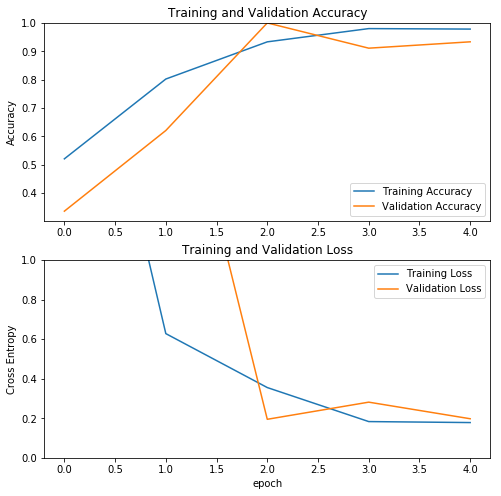

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [15]:
model.save("selectionv1.h5")